# Susceptibility

$$
Z = \sum_n e^{-\beta E_n}\\
m(B) = \frac{1}{\beta Z} \frac{\partial Z}{\partial B}\\
\chi = \lim_{B \to 0} \frac{\partial m}{\partial B}
$$

## Eigenvalues and eigenstates in presence of $\vec B$

### The easy ones: $n=0,1,3,4$

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\Delta_{\pm} \equiv \sqrt{v^2 + (\epsilon_d \pm \frac{1}{2}B)^2}\\
\ket{0,0} \text{ and } \ket{2,2}\begin{cases} E_{0} = E_{15} = \frac{1}{4}k \end{cases}\\
\text{ between }\ket{\uparrow,0},\ket{0,\uparrow} \text{ and between }\ket{\uparrow,2},\ket{2,\uparrow}\begin{cases}
E_{1} = E_{11} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B + \Delta_{+}\right)\\
E_{2} = E_{12} = \frac{1}{2}\left(\epsilon_d + \frac{1}{2}B - \Delta_{+}\right)
\end{cases}\\
\text{ between }\ket{\downarrow,0},\ket{0,\downarrow} \text{ and between }\ket{\downarrow,2},\ket{2,\downarrow}\begin{cases}
E_{3} = E_{13} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B + \Delta_{-}\right)\\
E_{4} = E_{14} = \frac{1}{2}\left(\epsilon_d - \frac{1}{2}B - \Delta_{-}\right)
\end{cases}\\
$$

### The easy ones in $n=2$

$$
\ket{\uparrow, \uparrow}: E_5 = \epsilon_d + \frac{1}{4}j + \frac{1}{2}B\\
\ket{\downarrow, \downarrow}: E_6 = \epsilon_d + \frac{1}{4}j - \frac{1}{2}B\\
\ket{\text{charge triplet 0}}: E_7 = \frac{1}{4}k\\
$$

### The remaining subspace

$$
\begin{pmatrix}
    \epsilon_d+\frac{1}{4}j & B & 0\\
    B & \epsilon_d - \frac{3}{4}j & -2v\\
    0 & -2v & -\frac{3}{4}k
\end{pmatrix}
$$
The basis is: $\ket{\text{spin trip. } 0}, \ket{\text{spin singl.}}, \ket{\text{charge singl.}}$

The next step is to diagonalize this matrix.

In [2]:
import itertools
from tqdm import tqdm
from time import sleep
from multiprocessing import Pool
import numpy as np
from math import *
import matplotlib
from matplotlib import pyplot as plt
import os

font = {'size'   : 17}

matplotlib.rc('font', **font)
#matplotlib.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"]= 5, 5
#plt.rcParams['figure.dpi'] = 90
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

## Alternate way

Okay, so keeping the $v$ and diagonalizing does not seem to be tractable. So we set $v=0$ and then diagonalize. The resultant susceptibility is

$$
\chi(\epsilon_d, k, j, \beta) = \frac{\left[4e^{-\beta \epsilon_d} + 2e^{-\beta \left(\epsilon_d + \frac{j}{4}\right)}\right] \frac{1}{4}\beta + e^{-\beta\left(\epsilon_d - \frac{j}{4}\right)} \sinh \left(\beta \frac{j}{2} \right) \frac{1}{j}}{4 + 3\exp\left\{-\beta \frac{k}{4}\right\} + \exp\left\{\beta \frac{3k}{4}\right\} + 4e^{-\beta \epsilon_d} + 2e^{-\beta \left(\epsilon_d + \frac{j}{4}\right)} + 2e^{-\beta\left(\epsilon_d - \frac{j}{4}\right)}\cosh \left(\beta \frac{j}{2}\right)}
$$
This has the behaviour 
$$
\frac{1}{\beta}\chi \to \frac{1}{8} \text{ when } T \to \infty
$$
and 
$$
\frac{1}{\beta}\chi \to \frac{1}{2j} \text{ when } T \to 0
$$
We can plot the susceptibility for the simpler case of $\epsilon_d=k=v=0$. It looks like
$$
	\chi(j, \beta) = \frac{\left[4 + 2e^{-\beta \frac{j}{4}}\right] \frac{1}{4}\beta + e^{\beta\frac{j}{4}} \sinh \left(\beta \frac{j}{2} \right) \frac{1}{j}}{12 + 2e^{-\beta \frac{j}{4}} + 2e^{\beta\frac{j}{4}}\cosh \left(\beta \frac{j}{2}\right)}\\
$$

100%|██████████| 50/50 [00:00<00:00, 265.54it/s]


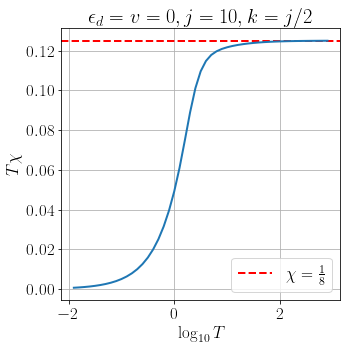

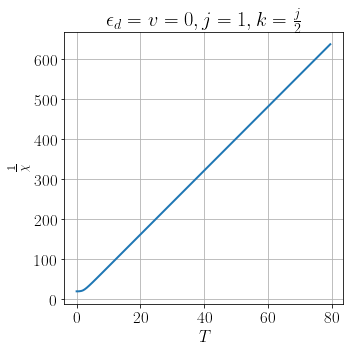

In [76]:
def get_chi(ed, j, k, T):
    #print (T+"\n")
    os.system("echo "+str(T)+" >> $HOME/status2.txt")
    beta = 1/T
    numerator = (4 * exp(-beta * ed) + 2 * exp(-beta * (ed + j/2))) * beta/4 + exp(-beta * (ed - j/4)) * sinh(beta * j/2) / j
    denominator = 4 + 3 * exp(-beta * k/4) + exp(beta * 3*k/4) + 4 * exp(-beta * ed) + 2 * exp(-beta * (ed + j/2)) + 2 * exp(-beta * (ed - j/4)) * cosh(beta * j/2)
    return numerator/denominator


j = 10
T_range = 10**np.arange(-2,3,0.1)
ed = 0
k = j/2
data = itertools.product([ed],[j],[k], T_range)
chi = []
# os.system("echo '' > $HOME/status2.txt")
for T in tqdm(T_range):
    chi.append(get_chi(ed, j, k, T))
chi = np.array(chi)
plt.title(r"$\epsilon_d = v = 0, j={}, k=j/2$".format(j))
plt.axhline(1/8, 0, 1, color="r", label=r"$\chi = \frac{1}{8}$", ls="--")
plt.plot(np.log10(T_range), T_range * chi)
plt.legend()
plt.ylabel(r"$T \chi$")
plt.xlabel(r"$\log_{10}T$")
#plt.xscale("log")
plt.show()
# plt.title(r"$\epsilon_d = v = 0, j=1, k=\frac{j}{2}$")
# plt.plot(np.log10(T_range), chi)
# plt.ylabel(r"$\chi$")
# plt.xlabel(r"$\log_{10}T$")
# #plt.xscale("log")
# plt.show()
plt.title(r"$\epsilon_d = v = 0, j=1, k=\frac{j}{2}$")
plt.plot(T_range[np.where(T_range <=100)], 1/chi[np.where(T_range <=100)])
plt.ylabel(r"$\frac{1}{\chi}$")
plt.xlabel(r"$T$")
plt.show()

## Effect of $k$

In [ ]:
j = 10
T_range = np.arange(0.01, 10, 0.01)
ed = 0
for k in j*np.arange(0,1.1,0.05):
    data = itertools.product([ed],[j],[k], T_range)
    chi = np.array(Pool(processes=40).starmap(get_chi,data))
    small_r = np.where(T_range < 2)
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    ax[0].plot(T_range[small_r], chi[small_r])
    ax[1].plot(T_range, chi)
    plt.suptitle(r"$k/j={:.2}$".format(k/j))
    plt.show()

## With $v$

$$
\newcommand{\ket}[1]{\vert{#1}\rangle}\\
\newcommand{\bra}[1]{\langle{#1}\vert}\\
\chi = \frac{\frac{\beta}{2} \cosh (\beta v) + \frac{1}{2v} \sinh(\beta v) + e^{-\beta\frac{1}{4}j}\frac{\beta}{2} - \frac{1}{2}\left(A_+ + A_-\right)e^{-\beta E_0} + \frac{1}{2}\sum_{\sigma=\pm}A_\sigma e^{-\beta E_\sigma}}{2 e^{-\beta \frac{k}{4}} + e^{\beta \frac{3k}{4}} + 8\cosh{\beta v} + 2e^{-\beta\frac{1}{4}j } + e^{-\beta E_0} + e^{-\beta E_+} + e^{-\beta E_-}}\\
E_0 = \epsilon_d + \frac{1}{4}j\\
E_\pm = v\left[ \gamma \pm \sqrt{\gamma^2 + 4} \right] + \epsilon_d - \frac{3}{4}j\\
A_\pm = \frac{\left( c^s_\pm \right)^2}{j - v\gamma \mp v\sqrt{4 + \gamma^2}}
$$

In [1]:
U = 0
j = 10
k = 10
v = 0
T_range = 10**np.arange(-3, 10, 0.1)
chi = []
for T in tqdm(T_range):
    E0 = j/4
    vgamma = ((3*j+k)/4 + U/2)/(2)
    c1sq = (sqrt(vgamma**2 + 4*v**2) + vgamma)/(2 * sqrt(vgamma**2 + 4*v**2))
    Ep = -3*j/4 + vgamma + sqrt(4*v**2 + vgamma**2)
    Em = -3*j/4 + vgamma - sqrt(4*v**2 + vgamma**2)
    Ap = c1sq/(j-vgamma - sqrt(4*v**2 + vgamma**2))
    Am = c1sq/(j-vgamma + sqrt(4*v**2 + vgamma**2))
    chi.append((np.cosh(v/T)/(2*T) + 1/(2*T) + np.exp(-j/(4*T))/(2*T) - (Ap + Am)*np.exp(-E0/T)/2 + Ap*np.exp(-Ap/T)/2 + Am*np.exp(-Am/T)/2) / (2*np.exp(-k/(4*T)) + np.exp(3*k/(4*T)) + 8*np.cosh(v/T) + 2*np.exp(-j/(4*T)) + np.exp(-E0/T) + np.exp(-Ep/T)+ np.exp(-Em/T)))

chi = np.array(chi)
plt.axhline(1/8, 0, 1)
plt.plot(np.log10(T_range), chi*T_range)
plt.show()


NameError: name 'np' is not defined

## Anirban da's Kondo

In [ ]:
def get_chi_K(j, T):
    beta = 1/T
    x = beta * j/2
    return (beta/4) * (exp(-x) + sinh(x)/x)/(exp(-x) + cosh(x))

j = 10
T_range = np.arange(0.01,50,0.01)
data = itertools.product([j], T_range)
chi = np.array(Pool(processes=40).starmap(get_chi_K,data))
plt.plot(np.log10(T_range), chi)
plt.show()
plt.plot(np.log10(T_range), T_range*chi)
plt.show()